In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

## Copier / collé 

Automatically created module for IPython interactive environment


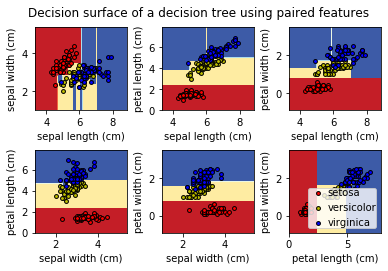

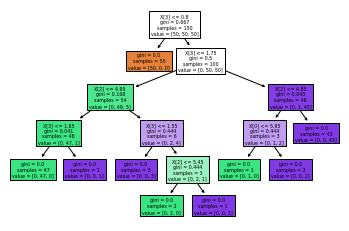

In [27]:
#Le copié collé 

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


## Adaptation et exploration

In [18]:
iris = load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

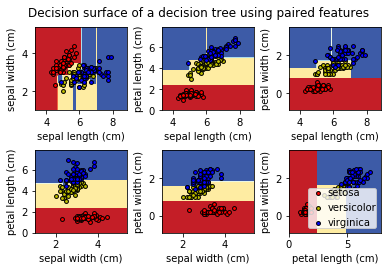

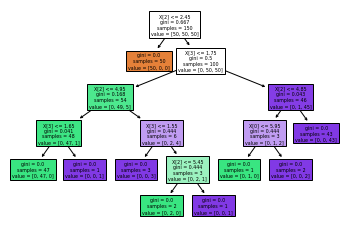

In [56]:
#Adapté :

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

#Commentons: 

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                              [1,2],[1,3],[2,3]]):
    
    #On veux étudier comment chaque pairs de donné va influer sur 
    #La classification de notre jeu de données avon donc énuméré leur 
    # coordonnée 
    X= df.iloc[:,pair]
    y= df.iloc[:,4]
    #On entraine le modèle a chaque fois avec chaque pairs de donnée

    clf= DecisionTreeClassifier().fit(X,y)
    #On créer notre sous-figure qui va contenir ce graphe 
    plt.subplot(2,3, pairidx +1)
    
    #On fixe notre minimum et notre maximum à partir des min max de
    #nos jeux de données.
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max() + 1
    y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max() + 1
    
    #On créer un nouveau jeu de donnée croisée avec des point qui
    #cartographie notre plan (Les coordonées sont générés avec un
    # arange partant des x max et y min et allant vers le x et y max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
#np.c permet de créer un matrice qui peux être prise par notre modèle
# Le .ravel applatit une matrice sous forme de vecteur. 
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)
#On fait en sorte que notre vecteur Z avec nos labels_ ais une forme 
#similaire à xx et yy afin de pouvoir les plot dans un même graphique 

    cs= plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    #On met nos points d'entrainement pour comparer par rapports 
    #Aux airs de décision préformé 
    
    for i, color in zip(range(n_classes), plot_colors):
        
        plt.scatter(X.iloc[:, 0].loc[df.iloc[:, 4] == i], X.iloc[:,1].loc[df.iloc[:, 4] == i], c=color,label = iris.target_names[i],
                   cmap= plt.cm.RdYlBu, edgecolor='black', s=15)
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(df.iloc[:,[0,1,2,3]],df.iloc[:,4])
plot_tree(clf, filled=True)
plt.show()

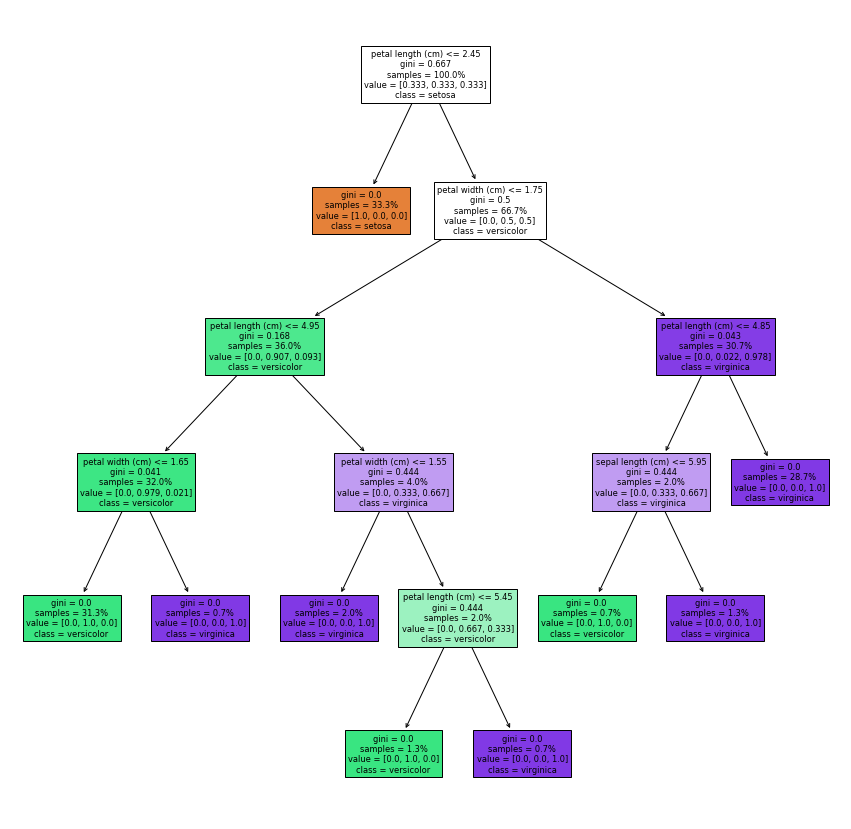

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [62]:
#Focus sur le plot lui même. 
plt.figure(figsize=[15,15])
plot_tree(clf, filled= True, feature_names=df.iloc[:,[0,1,2,3]].columns, class_names=iris.target_names, proportion=True)
plt.show() 

### Les paramètre du plot Tree:
<ul><li>Le seul paramètre obligatoire est notre modèle entrainé</li>
    <li>filled(True, False): Remplie l'arbre avec des couleurs si True </li>
    <li>feature_name (Liste): Utilise notre liste pour implémenter le nom des features utilisé (ici le nom des colonnes)</li>
    <li>Class_names(Liste): Affiche les nom des labels</li>
    <li>Proportion(True, False): Si true présente un % plutôt que le nombre de sample </li>
    <li>Impurity(True, False): Si true présente l'indice de Gini sur chaque node</li>
    <li> max_depht(int): On choisi la profondeur max de l'arbre si pas noté l'arbre est totalement généré</li></ul>
    
### L'indice de Gini:

L'indice de Gini est un indice d'impureté d'un jeu de donnée labelisé. C'est à dire qu'il représente les points qui ne sont pas forcément bien labelisé. Plus il est bas moins il y a de chance d'erreur. <br/>
L'indice de Gini représente donc un % de résultat "mal classé"<br/>
Il se calcul ainsi: Gini = 1 - (n1/n)<sup>2</sup> - (n2/n)<sup>2</sup>...

    

In [36]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);


In [38]:
xxx, yyy= np.meshgrid(xvalues, yvalues)

In [42]:
xxx, yyy


(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]))

In [49]:
 plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

<Figure size 432x288 with 0 Axes>

In [57]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


## Split, Predict & Evaluate the model 

In [107]:
from sklearn.model_selection import train_test_split

data_Tr, data_Te, target_Tr, target_Te = train_test_split(df.iloc[:,[0,1,2,3]], df.target
                                 , random_state=0
                                 , train_size=0.75)
#Je choisi une répartition 80 / 20 dans un premier temps mais celà me provoque un phénomène de 
#surapprentissage


In [108]:
data_Tr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


### Les paramètres de DecisionTreeClassifier

<ul><li>Criterion : On choisi notre critère de choix pour évaluer si on doit continuer ou non notre arbre. Le plus utilisé reste Gini mais on peut aussi utilisé l'Entropy</li>
    <li>Splitter: C'est la méthode avec laquel on choisi notre split les deux possibilités sont Best et Random</li>
    <li>max_depth: Même paramètre que pour le plot_tree.</li>
    <li>min_samples_split: le nombre minimum de sample jusqu'à laquelle on continue de créer de nouvelle node. De base il est égal à 2</li>
    <li>min_samples_leaf: C'est le nombre minimum de donnée nécessaire pour qu'une node soit considéré comme une leaf (C'est à dire une fin de branche). De base la valeur par défaut est 1 augmenter permet de lisser nos résultats</li>
    <li>max_features: On choisi le nombre de Feature_Max que l'on veut observer à chaque Split. </li>
    <li>min_impurity_decrease: On peut définir ici une valeurs de réduction de l'indice de gini minimum pour accepter la création d'une nouvelle Node ou si on conclue. Exemple : si on fixe cette valeur à 0.05 a un indice de 0.35 et qu'un nouveau split réduit notre indice à 0.33 alors on ne créer pas cette nouvelle nodes et notre node actuel devient une leaf</li>
    <li>min_impurity_splitfloat: défault=0 c'est une valeur de gini a partir de la laquel on arrête de créer des nodes. Exemple: Si on fixe cette valeurs à 0.10 alors quand une node atteind cette valeur ou moins elle deviens une leaf.</li>
    </ul>
     

In [208]:
ttc =DecisionTreeClassifier(criterion="gini", max_features=2)

In [209]:
ttc.fit(data_Tr, target_Tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

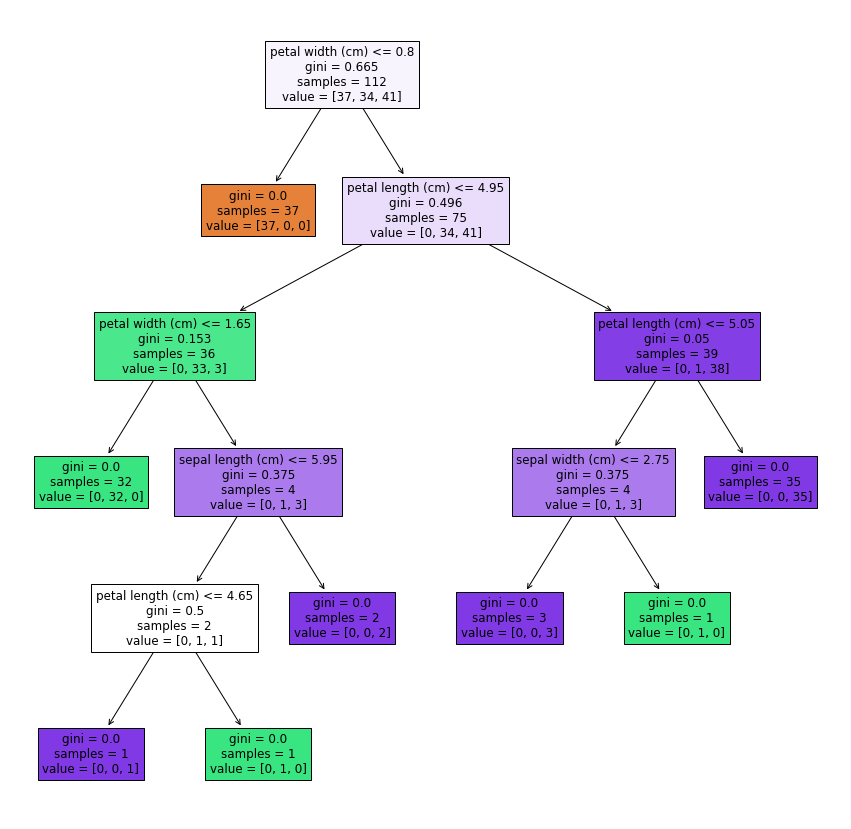

In [210]:
plt.figure(figsize=[15,15])
plot_tree(ttc, filled= True, feature_names= data_Tr.iloc[:,[0,1,2,3]].columns)
plt.show()

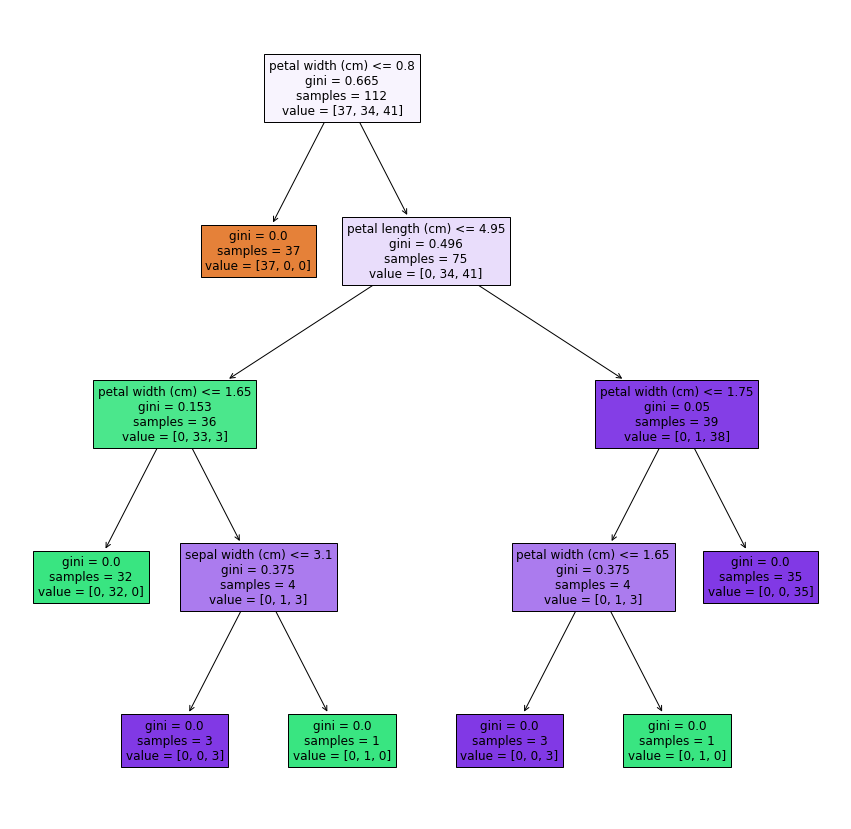

In [172]:
plt.figure(figsize=[15,15])
plot_tree(ttc, filled= True, feature_names= data_Tr.iloc[:,[0,1,2,3]].columns)
plt.show()
#feature_names= data_Tr.iloc[:,[0,1,2]].columns

In [147]:
result=ttc.predict(data_Te)

In [114]:
#On importe la fonction accuracy et confusion matrix pour visualiser nos données. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [116]:
#On calcul la précision(Accuracy ) avec un score en %
accuracy=accuracy_score(result, target_Te)
recall= recall_score(result, target_Te, average=None)
precision= precision_score(result, target_Te, average=None)
F1= f1_score(result, target_Te, average=None)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

print("R =", recall) # précision de prédiction des valeur Positive correctement prédit
#par rapport à l'ensemble des vrais valeurs
print("A =", accuracy) # Précision sur l'ensemble des bon résultat (True positive and True neg) par rapport
#A l'ensmble des valeurs.
print("P =", precision)# Précision de prédiction des valeurs Positive par rapport à tout les donnée prédite 
#postif. 
print('F1 =', F1) #Valeur qui fait la balance entre recall et precision pour avoir une valeur qui maximise les 
#deux valeurs

R = [1.  1.  0.9]
A = 0.9736842105263158
P = [1.     0.9375 1.    ]
F1 = [1.         0.96774194 0.94736842]


In [117]:
conf= confusion_matrix(target_Te, result)
conf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

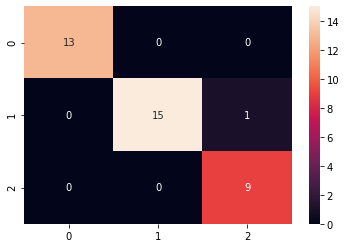

In [120]:
import seaborn as sns
sns.heatmap(conf, annot=True)